# Visualizing probability transformations

In [1]:
import os
import sys
import time
import random
sys.path.append('..')

import numpy as np
import matplotlib.pyplot as plt
from scipy.special import softmax
from scipy.stats.kde import gaussian_kde

from utils.ops import onehot_encode, project_sequence_ontriplex, project_sequence, optim_temperature, optim_temperature_scipy
from utils.metrics import neg_log_likelihood
from utils.visualization import plot_pdf_triplex, plot_prob_triplex

In [2]:
%matplotlib inline

## Generating fake target disitribution and simulated predictions 

In [3]:
n_samples = 500

In [4]:
target = np.array(random.choices(range(3), k=n_samples))
one_hot = onehot_encode(target)

## Some accurate predictions 

In [5]:
acc_logits = one_hot+np.random.randn(n_samples, 3)*0.5
acc_probs = softmax(acc_logits, axis=1)

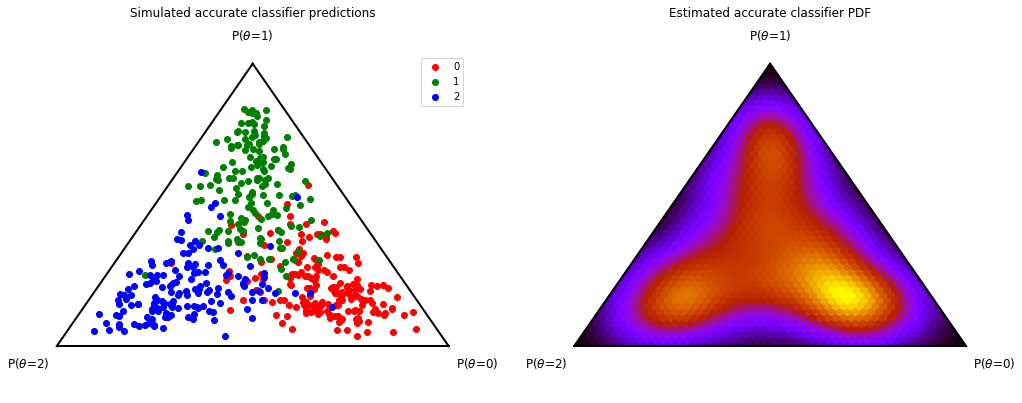

In [6]:
fig, ax_arr = plt.subplots(1, 2, figsize=(17, 6))
ax_arr[0] = plot_prob_triplex(acc_probs, target=target, ax=ax_arr[0], title='Simulated accurate classifier predictions', fontsize=12);
ax_arr[1] = plot_pdf_triplex(acc_probs, ax=ax_arr[1], title='Estimated accurate classifier PDF', fontsize=12);
plt.show()

### Apply temperature scaling 

In [7]:
# Temp scaling
T = optim_temperature(acc_logits, target)
adj_acc_probs = softmax(acc_logits/T, axis=1)

nll_before = neg_log_likelihood(acc_probs, target)
nll_after = neg_log_likelihood(adj_acc_probs, target)

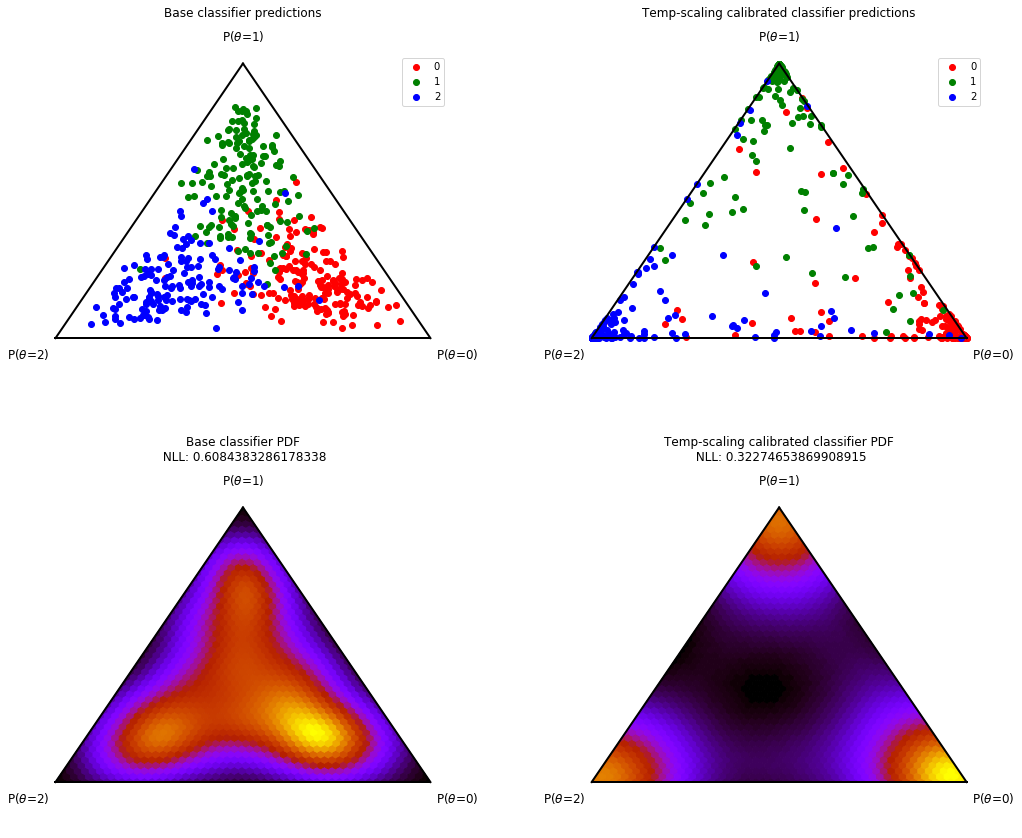

In [8]:
fig, ax_arr = plt.subplots(2, 2, figsize=(17, 14), gridspec_kw={'hspace': 0.4, 'wspace': 0.3})
ax_arr[0, 0] = plot_prob_triplex(acc_probs, target=target, ax=ax_arr[0, 0], title='Base classifier predictions', fontsize=12);
ax_arr[0, 1] = plot_prob_triplex(adj_acc_probs, target=target, ax=ax_arr[0, 1], title='Temp-scaling calibrated classifier predictions', fontsize=12);
ax_arr[1, 0] = plot_pdf_triplex(acc_probs, ax=ax_arr[1, 0], title='Base classifier PDF\n NLL: {}'.format(nll_before), fontsize=12);
ax_arr[1, 1] = plot_pdf_triplex(adj_acc_probs, ax=ax_arr[1, 1], title='Temp-scaling calibrated classifier PDF\n NLL: {}'.format(nll_after), fontsize=12);
plt.show()

## Twistted predictions

In [9]:
twisting = np.zeros((n_samples, 3))
twisting[np.arange(n_samples), target-1] = 0.7 + np.random.randn(n_samples)*0.2
twst_logits = 0.8 * (one_hot + twisting + np.random.randn(n_samples, 3)*0.3)
twst_probs = softmax(twst_logits, axis=1)

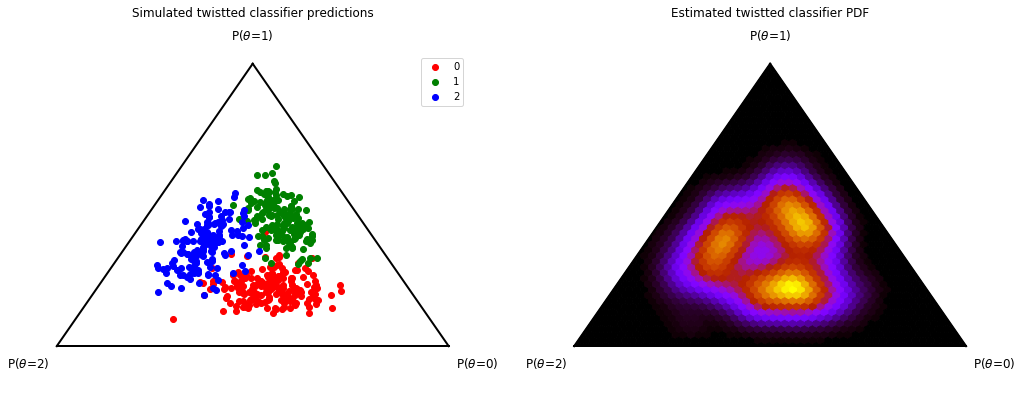

In [10]:
fig, ax_arr = plt.subplots(1, 2, figsize=(17, 6))
ax_arr[0] = plot_prob_triplex(twst_probs, target=target, ax=ax_arr[0], title='Simulated twistted classifier predictions', fontsize=12);
ax_arr[1] = plot_pdf_triplex(twst_probs, ax=ax_arr[1], title='Estimated twistted classifier PDF', fontsize=12);
plt.show()

### Apply temperature scaling 

In [11]:
# Temp scaling
T = optim_temperature(twst_logits, target)
adj_twst_probs = softmax(twst_logits/T, axis=1)

nll_before = neg_log_likelihood(twst_probs, target)
nll_after = neg_log_likelihood(adj_twst_probs, target)

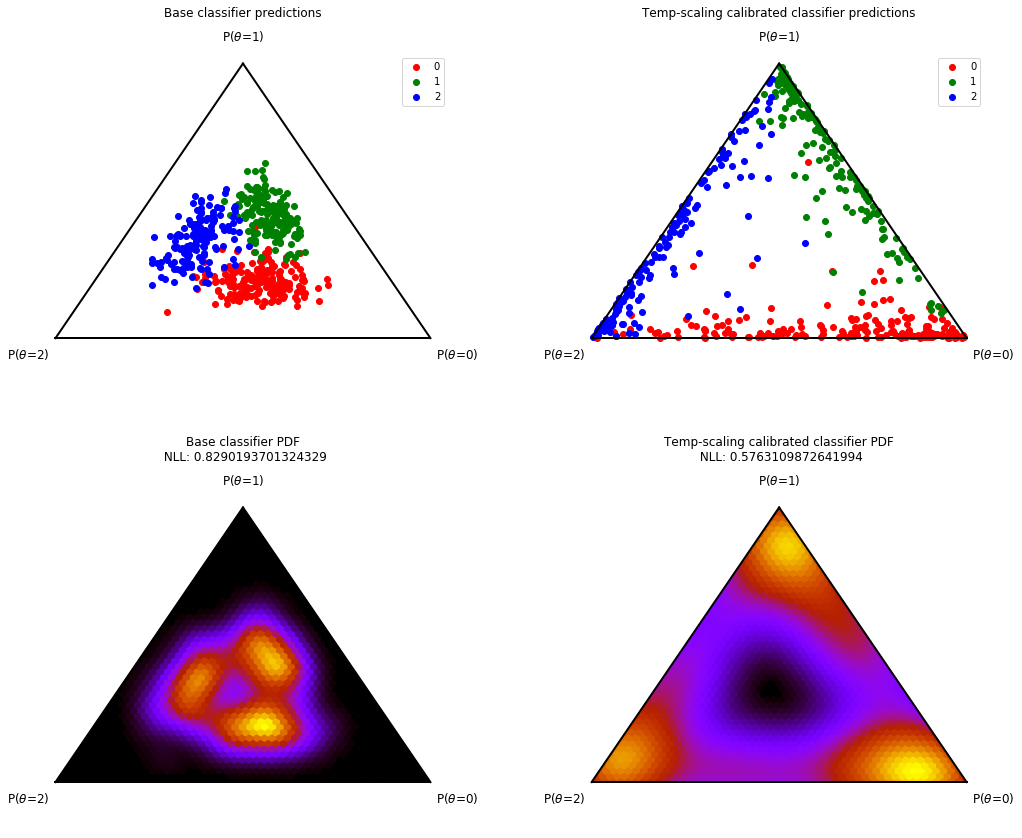

In [12]:
fig, ax_arr = plt.subplots(2, 2, figsize=(17, 14), gridspec_kw={'hspace': 0.4, 'wspace': 0.3})
ax_arr[0, 0] = plot_prob_triplex(twst_probs, target=target, ax=ax_arr[0, 0], title='Base classifier predictions', fontsize=12);
ax_arr[0, 1] = plot_prob_triplex(adj_twst_probs, target=target, ax=ax_arr[0, 1], title='Temp-scaling calibrated classifier predictions', fontsize=12);
ax_arr[1, 0] = plot_pdf_triplex(twst_probs, ax=ax_arr[1, 0], title='Base classifier PDF\n NLL: {}'.format(nll_before), fontsize=12);
ax_arr[1, 1] = plot_pdf_triplex(adj_twst_probs, ax=ax_arr[1, 1], title='Temp-scaling calibrated classifier PDF\n NLL: {}'.format(nll_after), fontsize=12);
plt.show()

## Shifted predictions 

In [13]:
offset = np.zeros((n_samples, 3))
offset[:, 1] = 0.5

shft_logits = one_hot + np.random.randn(n_samples, 3)*0.5 + offset
shft_probs = softmax(shft_logits, axis=1)

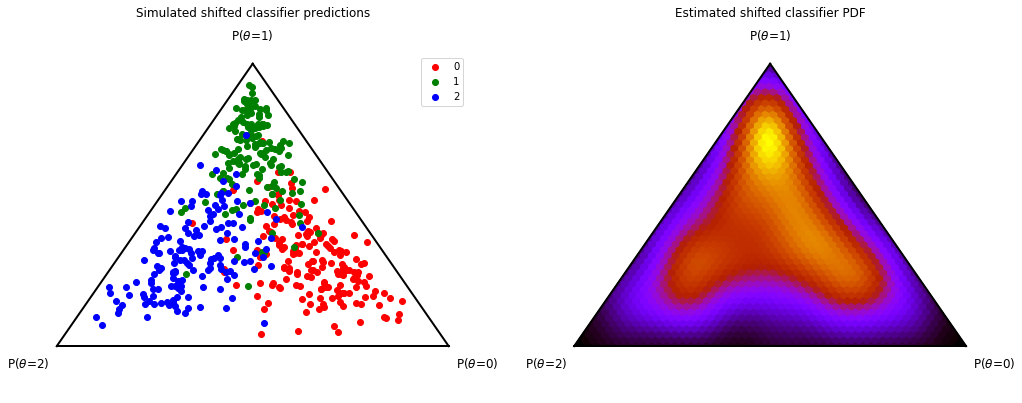

In [14]:
fig, ax_arr = plt.subplots(1, 2, figsize=(17, 6))
ax_arr[0] = plot_prob_triplex(shft_probs, target=target, ax=ax_arr[0], title='Simulated shifted classifier predictions', fontsize=12);
ax_arr[1] = plot_pdf_triplex(shft_probs, ax=ax_arr[1], title='Estimated shifted classifier PDF', fontsize=12);
plt.show()

### Apply temp-scaling 

In [15]:
# Temp scaling
T = optim_temperature(shft_logits, target)
adj_shft_probs = softmax(shft_logits/T, axis=1)

nll_before = neg_log_likelihood(shft_probs, target)
nll_after = neg_log_likelihood(adj_shft_probs, target)

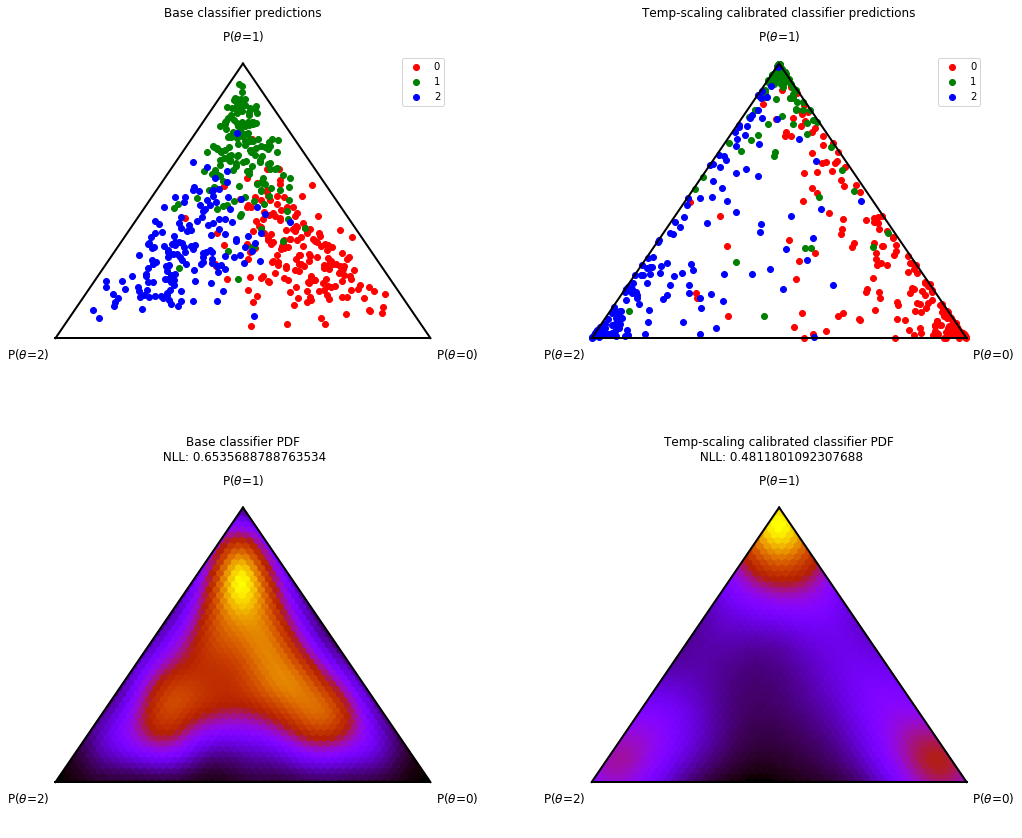

In [16]:
fig, ax_arr = plt.subplots(2, 2, figsize=(17, 14), gridspec_kw={'hspace': 0.4, 'wspace': 0.3})
ax_arr[0, 0] = plot_prob_triplex(shft_probs, target=target, ax=ax_arr[0, 0], title='Base classifier predictions', fontsize=12);
ax_arr[0, 1] = plot_prob_triplex(adj_shft_probs, target=target, ax=ax_arr[0, 1], title='Temp-scaling calibrated classifier predictions', fontsize=12);
ax_arr[1, 0] = plot_pdf_triplex(shft_probs, ax=ax_arr[1, 0], title='Base classifier PDF\n NLL: {}'.format(nll_before), fontsize=12);
ax_arr[1, 1] = plot_pdf_triplex(adj_shft_probs, ax=ax_arr[1, 1], title='Temp-scaling calibrated classifier PDF\n NLL: {}'.format(nll_after), fontsize=12);
plt.show()

## Shifted+Twistted predictions 

In [17]:
offset = np.zeros((n_samples, 3))
offset[:, 1:] = 0.3

twisting = np.zeros((n_samples, 3))
twisting[np.arange(n_samples), target-1] = 0.7 + np.random.randn(n_samples)*0.1

snt_logits = 0.8 * (one_hot + twisting + np.random.randn(n_samples, 3)*0.2) + offset
snt_probs = softmax(snt_logits, axis=1)

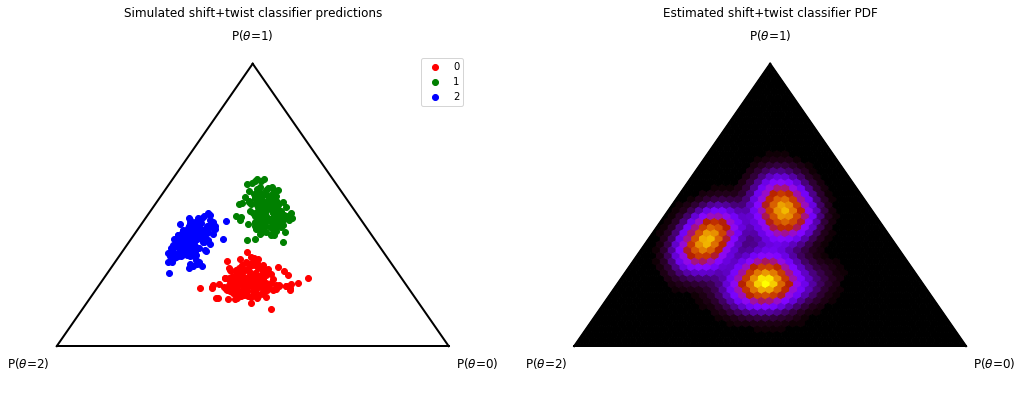

In [18]:
fig, ax_arr = plt.subplots(1, 2, figsize=(17, 6))
ax_arr[0] = plot_prob_triplex(snt_probs, target=target, ax=ax_arr[0], title='Simulated shift+twist classifier predictions', fontsize=12);
ax_arr[1] = plot_pdf_triplex(snt_probs, ax=ax_arr[1], title='Estimated shift+twist classifier PDF', fontsize=12);
plt.show()

### Apply temp-scaling

In [19]:
# Temp scaling
T = optim_temperature(snt_logits, target)
adj_snt_probs = softmax(snt_logits/T, axis=1)

nll_before = neg_log_likelihood(snt_probs, target)
nll_after = neg_log_likelihood(adj_snt_probs, target)

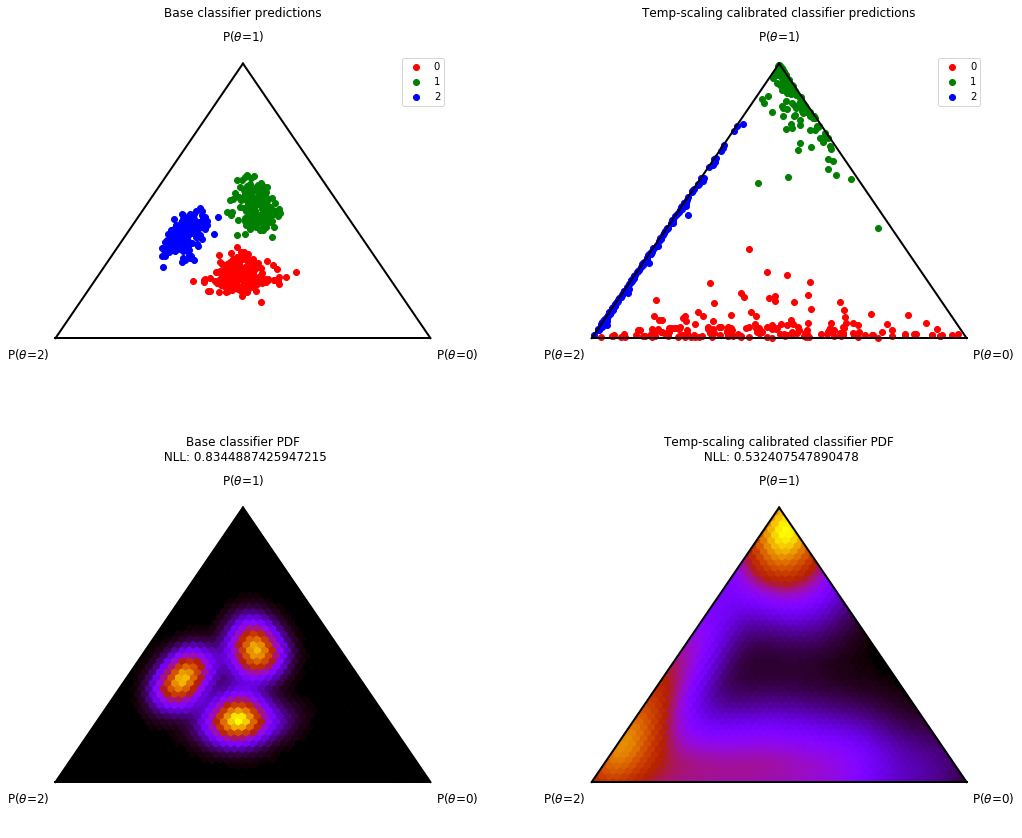

In [20]:
fig, ax_arr = plt.subplots(2, 2, figsize=(17, 14), gridspec_kw={'hspace': 0.4, 'wspace': 0.3})
ax_arr[0, 0] = plot_prob_triplex(snt_probs, target=target, ax=ax_arr[0, 0], title='Base classifier predictions', fontsize=12);
ax_arr[0, 1] = plot_prob_triplex(adj_snt_probs, target=target, ax=ax_arr[0, 1], title='Temp-scaling calibrated classifier predictions', fontsize=12);
ax_arr[1, 0] = plot_pdf_triplex(snt_probs, ax=ax_arr[1, 0], title='Base classifier PDF\n NLL: {}'.format(nll_before), fontsize=12);
ax_arr[1, 1] = plot_pdf_triplex(adj_snt_probs, ax=ax_arr[1, 1], title='Temp-scaling calibrated classifier PDF\n NLL: {}'.format(nll_after), fontsize=12);
plt.show()

### Map predictions to 2-D

In [21]:
h = project_sequence(twst_probs)

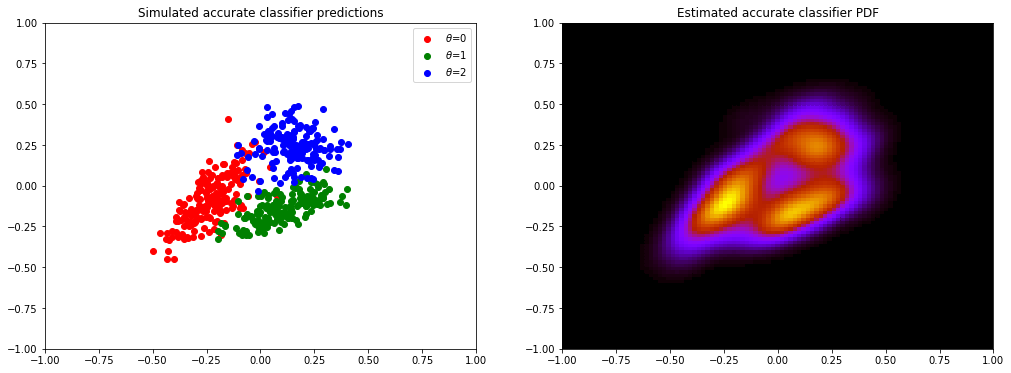

In [22]:
scale=100

k = gaussian_kde(h.T)
xi, yi = np.mgrid[-1:1:scale*1j, -1:1:scale*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

fig, ax_arr = plt.subplots(1, 2, figsize=(17, 6))
ax_arr[0].scatter(h[target==0, 0], h[target==0, 1], c='r', label='$\\theta$=0');
ax_arr[0].scatter(h[target==1, 0], h[target==1, 1], c='g', label='$\\theta$=1');
ax_arr[0].scatter(h[target==2, 0], h[target==2, 1], c='b', label='$\\theta$=2');
ax_arr[0].set_ylim(-1, 1)
ax_arr[0].set_xlim(-1, 1)
ax_arr[0].set_title('Simulated accurate classifier predictions')
ax_arr[0].legend();

ax_arr[1].pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.get_cmap('gnuplot'))
ax_arr[1].set_ylim(-1, 1)
ax_arr[1].set_xlim(-1, 1)
ax_arr[1].set_title('Estimated accurate classifier PDF')

plt.show()

### Return to triplex coordinates 

In [23]:
retrieved_probs = project_sequence_ontriplex(h)

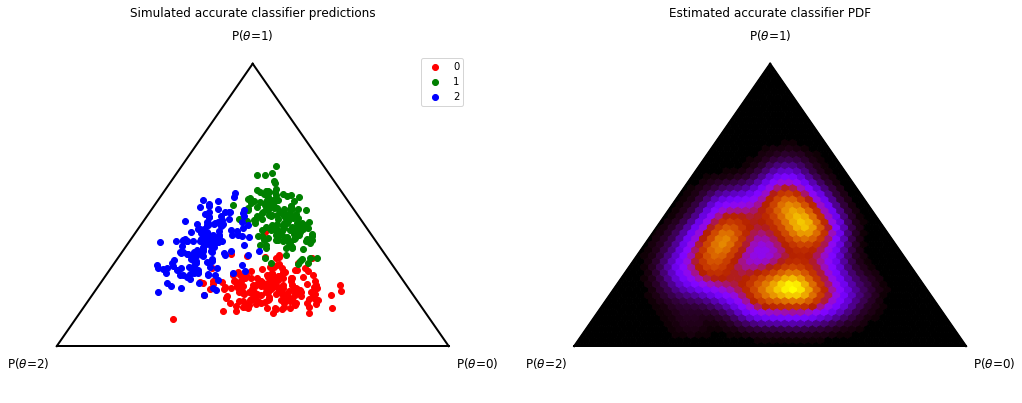

In [24]:
fig, ax_arr = plt.subplots(1, 2, figsize=(17, 6))
ax_arr[0] = plot_prob_triplex(retrieved_probs, target=target, ax=ax_arr[0], title='Simulated accurate classifier predictions', fontsize=12);
ax_arr[1] = plot_pdf_triplex(retrieved_probs, ax=ax_arr[1], title='Estimated accurate classifier PDF', fontsize=12);
plt.show()